> O uso excessivo de redes sociais causa impacto na saúde mental dos jovens e dos adultos?

### População 
Jovens e adultos

### Variáveis

*   **Variável Categorica**: \[*Quantidade de tempo que se utiliza redes sociais*\]
* Menos  de uma hora -  grupo 1
* Entre 1 e 2 horas  -  grupo 2
* Entre 2 e 3 horas - grupo 3
* Entre 3 e 4 horas -  grupo 4
* Entre 4 e 5 horas - grupo 5
* Mais de 5 horas -  grupo 6


*   **Variável Quantitativa**: Perguntas relacionadas a saude mental, com uma escala de 1 a 5


###Hipóteses
*   **Hipótese Nula:** Não há relação entre o usi excessivo de redes sociais e 

*   **Hipótese Alternativa:** O uso excessivo de redes sociais causa impacto na saúde mental dos jovens e dos adultos.


###Iniciando nosso programa
Importando as bibliotecas

In [2]:
# -*- coding: utf-8 -*-

import numpy
import pandas
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 
import seaborn
import matplotlib.pyplot as plt

pandas.set_option('mode.chained_assignment', None)

In [3]:
#Importando o Dataset

data = pandas.read_csv('./datasets/data.csv', low_memory=False)
data.head()

,Timestamp,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",3,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",6,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",4,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",6,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",3,3,...,4,4,5,5,3,3,3,4,4,1


## Colunas presentes no dataset

* Timestamp
* col1. Qual a sua idade? 
* col2. Qual o seu gênero? 
* col3. Qual o seu status de relacionamento 
* col4. Occupation Status,
* col5. A que tipo de organização você está afiliado?
* col6. Você usa redes sociais?
* col7. Quais plataformas de mídia social você costuma usar?
* col8. Qual é o tempo médio que você passa nas redes sociais todos os dias?
* col9. Com que frequência você usa mídias sociais sem um propósito específico? (Pergunta relacionada a foco)
* col10. Com que frequência você se distrai com as redes sociais quando está ocupado fazendo alguma coisa? (Pergunta relacionada a foco)
* col11. Você se sente inquieto/ansioso se não usa as redes sociais há algum tempo? (Pergunta relacionada a ansiedade)
* col12. Em uma escala de 1 a 5, quão facilmente você se distrai? (Pergunta relacionada a foco)
* col13. Numa escala de 1 a 5, o quanto você se incomoda com as preocupações? (Pergunta relacionada a ansiedade)
* col14. Você acha difícil se concentrar nas coisas? (Pergunta relacionada a foco)
* col15. Numa escala de 1 a 5, com que frequência você se compara a outras pessoas de sucesso através do uso das redes sociais? (Pergunta relacionada a autoestima)
* col16. Seguindo a pergunta anterior, como você se sente em relação a essas comparações, de modo geral? (Pergunta relacionada a autoestima)
* col17. Com que frequência você busca validação de recursos de mídia social? (Pergunta relacionada a autoestima)
* col18. Com que frequência você se sente deprimido ou pra baixo? (Pergunta relacionada a depressão)
* col19. Numa escala de 1 a 5, com que frequência oscila o seu interesse nas atividades diárias? (Pergunta relacionada a depressão)
* col20. Numa escala de 1 a 5, com que frequência você enfrenta problemas relacionados ao sono? (Pergunta relacionada a depressão)

In [4]:
##Vamos analisar a media da colunas númericas
media_por_coluna = data.mean(numeric_only=True)
print(f'Media das colunas numericas')
print(media_por_coluna)
print(f'')
##Analisando a mediana de todas as colunas numéricas
mediana = data.median(numeric_only=True)
print(f'Mediana das colunas numericas')
print(mediana)
##Analisando o desvio padrao da coluna 8
desvios_padrao = data['col8'].std()
print(f'')
print(f'Desvios padrao das colunas')
desvio_padrao_por_coluna = data.std(numeric_only=True)
print(desvio_padrao_por_coluna)

Media das colunas numericas
col1     26.136590
col8      3.908524
col9      3.553015
col10     3.320166
col11     2.588358
col12     3.349272
col13     3.559252
col14     3.245322
col15     2.831601
col16     2.775468
col17     2.455301
col18     3.255717
col19     3.170478
col20     3.201663
dtype: float64

Mediana das colunas numericas
col1     22.0
col8      4.0
col9      4.0
col10     3.0
col11     2.0
col12     3.0
col13     4.0
col14     3.0
col15     3.0
col16     3.0
col17     2.0
col18     3.0
col19     3.0
col20     3.0
dtype: float64

Desvios padrao das colunas
col1     9.915110
col8     1.590319
col9     1.096299
col10    1.328137
col11    1.257059
col12    1.175552
col13    1.283356
col14    1.347105
col15    1.407835
col16    1.056479
col17    1.247739
col18    1.313033
col19    1.256666
col20    1.461619
dtype: float64


<h1> Vamos começar a analisar as colunas </h1>

<h3>Em primeiro lugar, iremos analisar a coluna 8 com a coluna 9</h3>

## Questão de pesquisa

    O tempo que se passa em redes sociais está associada à quanto você você usa mídias sociais sem um propósito específico?

### População de jovens e adultos 

### Variáveis

*    **Variável Categorica:** Qual a quantidade tempo que você passa em redes sociais

*    **Variavel numérica:** Com que frequência você usa mídias sociais sem um propósito específico? (escala de 1 a 5)

### Hipóteses

*    **Hipótese Nula:** Não há relação entre o uso excessivo de redes sociais e o quanto você você usa mídias sociais sem um propósito específico

*    **Hipótese Alternativa:** Há relação entre o uso excessivo de redes sociais e o quanto você você usa mídias sociais sem um propósito específico


In [36]:
sub3 = data[['col8', 'col9']].dropna()

model2 = smf.ols(formula='col9 ~ C(col8)', data=sub3).fit()
print (model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   col9   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     19.63
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           8.60e-18
Time:                        14:08:40   Log-Likelihood:                -681.06
No. Observations:                 481   AIC:                             1374.
Df Residuals:                     475   BIC:                             1399.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.3824      0.172     13.846   

In [37]:
mc1 = multi.MultiComparison(sub3['col9'], sub3['col8'])
res1 = mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.6748 0.0173  0.0747 1.2749   True
     1      3   1.0929    0.0  0.5237 1.6621   True
     1      4   1.2736    0.0  0.6982 1.8489   True
     1      5   1.3639    0.0  0.7594 1.9684   True
     1      6   1.6866    0.0  1.1268 2.2465   True
     2      3   0.4181 0.0812 -0.0284 0.8646  False
     2      4   0.5988 0.0025  0.1445  1.053   True
     2      5   0.6891  0.001  0.1985 1.1798   True
     2      6   1.0118    0.0  0.5773 1.4463   True
     3      4   0.1807 0.8102 -0.2319 0.5932  False
     3      5    0.271 0.5228 -0.1813 0.7233  False
     3      6   0.5937 0.0002   0.203 0.9844   True
     4      5   0.0904 0.9934 -0.3697 0.5504  False
     4      6   0.4131  0.038  0.0135 0.8126   True
     5      6   0.3227  0.291 -0.1178 0.7632  False
---------------------------------------------------


Text(9.444444444444445, 0.5, 'quanto você você usa mídias sociais sem um propósito específico')

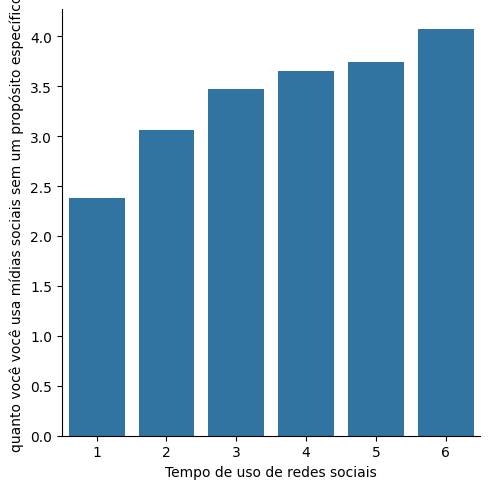

In [38]:
seaborn.catplot(x='col8', y='col9', data=sub3, kind="bar", errorbar=None)
plt.xlabel('Tempo de uso de redes sociais')
plt.ylabel('quanto você você usa mídias sociais sem um propósito específico')

<h2> Conclusão </h2>

* O grupo 1 comparado com todos os outros grupos mostram diferenças médias estatisticamente significativas.

* Os grupos 2 e 4, 2 e 5, 2 e 6 mostram diferenças médias estatisticamente significativas.

* Os grupos 3 e 6 mostra diferença média estatisticamente significativa e entre os grupos 4 e 6, 5 e 6, tembém há diferenças médias estatisticamente significativas.

* **Pode-se concluir que as pessoas que estão no grupo 1 (Menos de uma hora) e no grupo 2 (Entre 1 e 2 horas) acabam não gastando seu tempo com redes sociais sem motivo, enquanto as pessoas, princiaplmente, do grupo 6 (Mais de 5 horas) acabam gastando seu tempo sem motivo.**
  
* **Analisando os resultados percebe-se que o uso excessivo de redes sociais está relacionado a uma maior dependencia sobre ela, visto que pessoas que usam bastante suas redes acabam por usa-lá sem um propósito específico.**

<h3>Agora, iremos analisar a coluna 8 com a coluna 10</h3>

## Questão de pesquisa

    O tempo que se passa em redes sociais está associada à quanto você se ditrai com mídias sociais enquanto está ocupado fazendo algo?

### População de jovens e adultos 

### Variáveis

*    **Variável Categorica:** Qual a quantidade tempo que você passa em redes sociais

*    **Variavel numérica:** Com que frequência você se distrai com as redes sociais quando está ocupado fazendo alguma coisa? (pergunta de 1 a 5)

### Hipóteses

*    **Hipótese Nula:** Não há relação entre o uso excessivo de redes sociais e a frequência você se distrai com as 
redes sociais quando está ocupado fazendo alguma coisa

*    **Hipótese Alternativa:** Há relação entre o uso excessivo de redes sociais e o quanto você se distrai com as 
redes sociais quando está ocupado fazendo alguma coisa

In [18]:
sub3 = data[['col8', 'col10']].dropna()

model2 = smf.ols(formula='col10 ~ C(col8)', data=sub3).fit()
print (model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  col10   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     20.19
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           2.78e-18
Time:                        01:37:02   Log-Likelihood:                -772.16
No. Observations:                 481   AIC:                             1556.
Df Residuals:                     475   BIC:                             1581.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.8235      0.208      8.770   

In [19]:
mc1 = multi.MultiComparison(sub3['col10'], sub3['col8'])
res1 = mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.8336 0.0137  0.1084 1.5588   True
     1      3   1.4933    0.0  0.8054 2.1812   True
     1      4   1.6281    0.0  0.9328 2.3234   True
     1      5   1.9526    0.0  1.2221 2.6831   True
     1      6   1.9696    0.0   1.293 2.6462   True
     2      3   0.6597 0.0068  0.1201 1.1992   True
     2      4   0.7945 0.0006  0.2455 1.3434   True
     2      5    1.119    0.0   0.526 1.7119   True
     2      6    1.136    0.0  0.6109  1.661   True
     3      4   0.1348 0.9719 -0.3638 0.6334  False
     3      5   0.4593 0.1568 -0.0874 1.0059  False
     3      6   0.4763 0.0466  0.0041 0.9484   True
     4      5   0.3245 0.5522 -0.2314 0.8804  False
     4      6   0.3415 0.3304 -0.1414 0.8244  False
     5      6    0.017    1.0 -0.5154 0.5493  False
---------------------------------------------------


Text(9.444444444444445, 0.5, 'quanto se distrai com redes sociais enquanto faz algo')

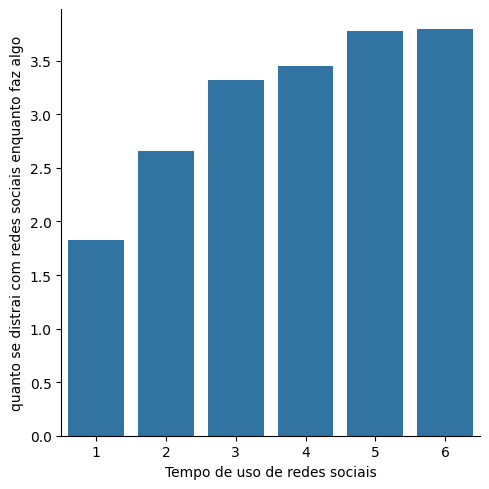

In [10]:
seaborn.catplot(x='col8', y='col10', data=sub3, kind="bar", errorbar=None)
plt.xlabel('Tempo de uso de redes sociais')
plt.ylabel('quanto se distrai com redes sociais enquanto faz algo')

<h2> Conclusão </h2>

* O grupo 1 comparado com todos os outros grupos mostram diferenças médias estatisticamente significativas.
    
* O grupo 2 comparado com todos os outros grupos mostram diferenças médias estatisticamente significativas.

* **Podemos concluir, que as pessoas que estão no grupo 1 (menos de uma hora) e no grupo 2 (entre 1 e 2 horas) são menos propicias a se distrairem
com redes sociais, conseguindo manter o foco nas atividades importantes. Já, principalmente as pessoas dos grupos 5 (entre 4 e 5 horas) e as do
grupo 6 (mais de 5 horas) são as que mais se distraem, não conseguindo manter o foco.**

* **Ou seja o uso excessivo de redes sociais realmente aumenta a distração e a perda do foco, levando a uma maior procastinação.**




<h3>Agora, iremos analisar a coluna 8 com a coluna 11</h3>

## Questão de pesquisa

    O tempo que se passa em redes sociais está associada à quanto você se fica inquieto/ansioso quando não usa há algum tempo?

### População de jovens e adultos 

### Variáveis

*    **Variável Categorica:** Qual a quantidade tempo que você passa em redes sociais

*    **Variavel numérica:** Você se sente inquieto se não usa as redes sociais há algum tempo? (pergunta de 1 a 5)

### Hipóteses

*    **Hipótese Nula:** Não há relação entre o uso excessivo de redes sociais e o quanto você se sente inquieto se nao usa as redes 

*    **Hipótese Alternativa:** Há relação entre o uso excessivo de redes sociais e o quanto você se sente inquieto se nao usa as redes 

In [39]:
sub3 = data[['col8', 'col11']].dropna()

model2 = smf.ols(formula='col11 ~ C(col8)', data=sub3).fit()
print (model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  col11   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     21.01
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           5.44e-19
Time:                        16:20:26   Log-Likelihood:                -744.00
No. Observations:                 481   AIC:                             1500.
Df Residuals:                     475   BIC:                             1525.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.3824      0.196      7.049   

In [40]:
mc1 = multi.MultiComparison(sub3['col11'], sub3['col8'])
res1 = mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.4462 0.4241 -0.2378 1.1302  False
     1      3   1.2414    0.0  0.5926 1.8902   True
     1      4   1.2413    0.0  0.5855 1.8971   True
     1      5   1.4535    0.0  0.7645 2.1425   True
     1      6   1.8159    0.0  1.1778  2.454   True
     2      3   0.7952 0.0001  0.2863 1.3041   True
     2      4   0.7951 0.0002  0.2773 1.3128   True
     2      5   1.0072    0.0   0.448 1.5665   True
     2      6   1.3697    0.0  0.8745 1.8649   True
     3      4  -0.0001    1.0 -0.4704 0.4701  False
     3      5   0.2121 0.8478 -0.3035 0.7276  False
     3      6   0.5745 0.0034  0.1292 1.0198   True
     4      5   0.2122 0.8565 -0.3122 0.7365  False
     4      6   0.5746 0.0045  0.1192 1.0301   True
     5      6   0.3625 0.3073 -0.1396 0.8645  False
---------------------------------------------------


Text(9.444444444444445, 0.5, 'Inquieto se não usa as redes sociais há algum tempo')

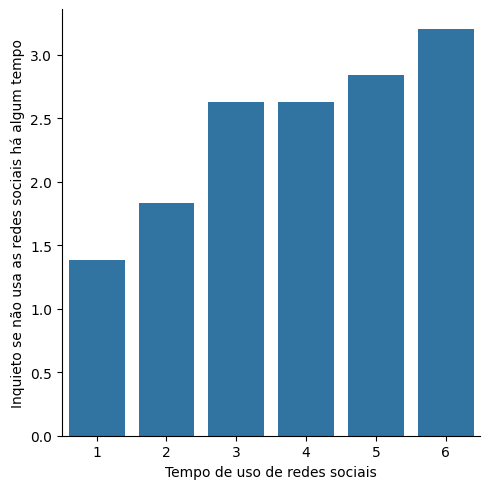

In [42]:
seaborn.catplot(x='col8', y='col11', data=sub3, kind="bar", errorbar=None)
plt.xlabel('Tempo de uso de redes sociais')
plt.ylabel('Inquieto se não usa as redes sociais há algum tempo')

<h2> Conclusão </h2>

* O grupo 1 comparado com todos os outros grupos, com exceção do grupo 2, mostram diferenças médias estatisticamente significativas.
    
* O grupo 2 comparado com todos os outros grupos, com exceção do grupo 1, mostram diferenças médias estatisticamente significativas.

* O grupo 6 comparado com todos os outros grupos, com exceção do grupo 5, mostram diferenças médias estatisticamente significativas.

* **Logo, pode-se concluir que as pessoas que estão no grupo 1 (menos de uma hora) e no grupo 2 (entre 1 e 2 horas) são menos propicias a ficarem inquietas
se não usarem suas redes sociais há um certo tempo, enquanto pessoas do grupo 6 (mais de 5 horas) são as que mais ficam inquietas.**

* **Analisando essas informações percebe-se que o uso excessivo de redes sociais causa um certo vicio, deixando as pessoas mais ansiosas caso não tenham
usado suas midias há um certo tempo.**

<h3>Agora, iremos analisar a coluna 8 com a coluna 12</h3>

## Questão de pesquisa

    O tempo que se passa em redes sociais está associada ao quanto voce se distrai com facilidade?

### População de jovens e adultos 

### Variáveis

*    **Variável Categorica:** Qual a quantidade tempo que você passa em redes sociais

*    **Variavel numérica:** Quão facilmente voce se distrai? (pergunta de 1 a 5)

### Hipóteses

*    **Hipótese Nula:** Não há relação entre o uso excessivo de redes sociais e o quão facilmente você se distrai

*    **Hipótese Alternativa:** Há relação entre o uso excessivo de redes sociais e o quão facilmente você se distrai

In [44]:
sub3 = data[['col8', 'col12']].dropna()

model2 = smf.ols(formula='col12~ C(col8)', data=sub3).fit()
print (model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  col12   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     15.88
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           1.80e-14
Time:                        16:41:41   Log-Likelihood:                -722.64
No. Observations:                 481   AIC:                             1457.
Df Residuals:                     475   BIC:                             1482.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.0588      0.188     10.975   

In [45]:
mc1 = multi.MultiComparison(sub3['col12'], sub3['col8'])
res1 = mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.8697 0.0022  0.2155  1.524   True
     1      3   1.2481    0.0  0.6275 1.8687   True
     1      4   1.4143    0.0   0.787 2.0416   True
     1      5    1.583    0.0  0.9239  2.242   True
     1      6   1.6912    0.0  1.0808 2.3016   True
     2      3   0.3784 0.2286 -0.1084 0.8651  False
     2      4   0.5445 0.0216  0.0493 1.0398   True
     2      5   0.7132 0.0021  0.1783 1.2482   True
     2      6   0.8214    0.0  0.3477 1.2951   True
     3      4   0.1662 0.8979 -0.2836  0.616  False
     3      5   0.3349 0.3773 -0.1583  0.828  False
     3      6   0.4431 0.0361  0.0171  0.869   True
     4      5   0.1687 0.9295 -0.3329 0.6702  False
     4      6   0.2769 0.4547 -0.1588 0.7125  False
     5      6   0.1082 0.9875 -0.3721 0.5885  False
---------------------------------------------------


Text(9.444444444444445, 0.5, 'O quão facilmente voce se distrai')

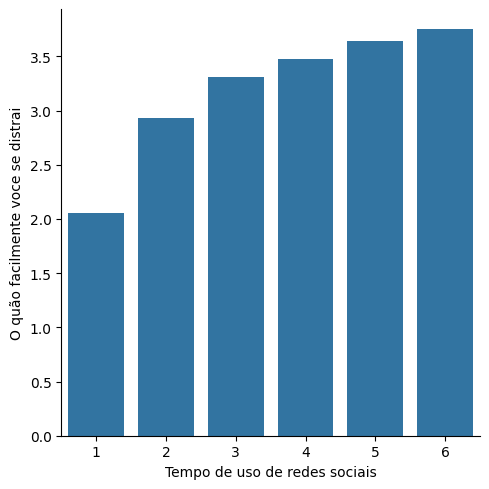

In [28]:
seaborn.catplot(x='col8', y='col12', data=sub3, kind="bar", errorbar=None)
plt.xlabel('Tempo de uso de redes sociais')
plt.ylabel('O quão facilmente voce se distrai')

<h3>Conclusão</h3>

* O grupo 1 comparado com todos os outros grupos mostram diferenças médias estatisticamente significativas.

* O grupo 2 comparado com todos os outros grupos, com exceção do grupo 3, mostram diferenças médias estatisticamente significativas.

* **Podemos concluir que as pessoas inclusas no grupo 1 (menos de uma hora) e no grupo 2 (entre 1 e 2) não se distraem facilmente, enquanto as
pessoas do grupo 5 (Entre 4 e 5 horas) e do grupo 6 (Mais de 5 horas) se distraem muito mais facilidade.**

* **Ou seja, analisando as informações percebe-se que o uso excessivo de redes sociais causa uma maior distração e falta de atenção.**

<h3>Agora, iremos analisar a coluna 8 com a coluna 13</h3>

## Questão de pesquisa

    O tempo que se passa em redes sociais está associada ao quanto voce se incomoda com preocupações?

### População de jovens e adultos 

### Variáveis

*    **Variável Categorica:** Qual a quantidade tempo que você passa em redes sociais

*    **Variavel numérica:** O quanto você se incomoda com as preocupações? (pergunta de 1 a 5)

### Hipóteses

*    **Hipótese Nula:** Não há relação entre o uso excessivo de redes sociais e o quanto você se incomoda com preocupações.

*    **Hipótese Alternativa:** Há relação entre o uso excessivo de redes sociais e o quanto você se incomoda com preocupações.

In [31]:
sub3 = data[['col8', 'col13']].dropna()

model2 = smf.ols(formula='col13~ C(col8)', data=sub3).fit()
print (model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  col13   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     14.41
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           3.75e-13
Time:                        01:59:23   Log-Likelihood:                -768.04
No. Observations:                 481   AIC:                             1548.
Df Residuals:                     475   BIC:                             1573.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.3529      0.206     11.413   

In [33]:
mc1 = multi.MultiComparison(sub3['col13'], sub3['col8'])
res1 = mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.7042 0.0588 -0.0148 1.4233  False
     1      3    1.053 0.0002   0.371  1.735   True
     1      4   1.5503    0.0  0.8609 2.2397   True
     1      5   1.3336    0.0  0.6093 2.0579   True
     1      6   1.6471    0.0  0.9762 2.3179   True
     2      3   0.3488 0.4248 -0.1862 0.8838  False
     2      4   0.8461 0.0002  0.3018 1.3904   True
     2      5   0.6294 0.0278  0.0415 1.2173   True
     2      6   0.9429    0.0  0.4222 1.4635   True
     3      4   0.4973 0.0477  0.0029 0.9916   True
     3      5   0.2806 0.6763 -0.2614 0.8226  False
     3      6   0.5941 0.0042  0.1259 1.0622   True
     4      5  -0.2167  0.871 -0.7679 0.3345  False
     4      6   0.0968 0.9924  -0.382 0.5756  False
     5      6   0.3134  0.533 -0.2144 0.8413  False
---------------------------------------------------


Text(9.444444444444445, 0.5, 'O quanto você se incomoda com as preocupações')

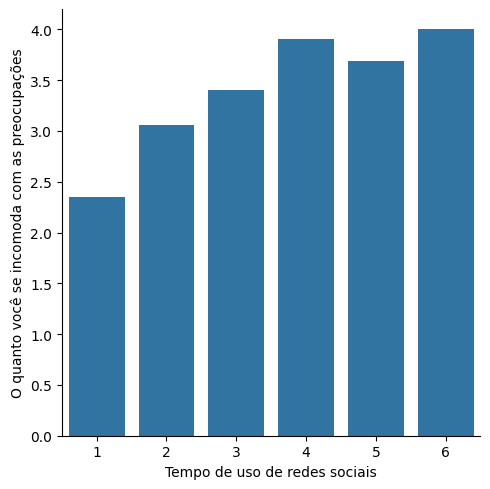

In [44]:
seaborn.catplot(x='col8', y='col13', data=sub3, kind="bar", errorbar=None)
plt.xlabel('Tempo de uso de redes sociais')
plt.ylabel('O quanto você se incomoda com as preocupações')

<h3>Conclusão</h3>

* O grupo 6 comparado com todos os outros grupos mostram diferenças médias estatisticamente significativas.

* O grupo 1 comparado com todos os outros grupos, com excessão do grupo 2, mostram diferenças médias estatisticamente significativas.

* O grupo 2 comparado com todos os outros grupos, com excessão do grupo 3, mostram diferenças médias estatisticamente significativas.

* **Podemos concluir que as pessoas do grupo 1 (Menos de uma hora) e do grupo 2 (Entre 1 e 2 horas) não se incomodam tanto com preocupações,
enquanto as pessoas, principalmente do grupo 4 (Entre 3 e 4 horas) e do grupo 6 (Mais de 5 horas) se sentem mais incomodados com essas preocupações.**

* **Ou seja, de acordo com os resultados percebemos que o uso excessivo de redes sociais está ligada a o aumento de ansiedade entre os usúarios,
visto que eles passam a se incomodar com preocupações.**


<h3>Agora, iremos analisar a coluna 8 com a coluna 14</h3>

## Questão de pesquisa

    O tempo que se passa em redes sociais está associada a dificuldade de se concentrar?

### População de jovens e adultos 

### Variáveis

*    **Variável Categorica:** Qual a quantidade tempo que você passa em redes sociais

*    **Variavel numérica:** O quanto você sente dificuldade de se concentrar? (pergunta de 1 a 5)

### Hipóteses

*    **Hipótese Nula:** Não há relação entre o uso excessivo de redes sociais e a dificuldade de se concentrar.

*    **Hipótese Alternativa:** Há relação entre o uso excessivo de redes sociais  e a dificuldade de se concentrar.

In [47]:
sub3 = data[['col8', 'col14']].dropna()

model2 = smf.ols(formula='col14~ C(col8)', data=sub3).fit()
print (model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  col14   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     15.35
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           5.37e-14
Time:                        02:09:15   Log-Likelihood:                -789.31
No. Observations:                 481   AIC:                             1591.
Df Residuals:                     475   BIC:                             1616.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.7941      0.215      8.326   

In [48]:
mc1 = multi.MultiComparison(sub3['col14'], sub3['col8'])
res1 = mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.9202 0.0066  0.1686 1.6717   True
     1      3   1.4435    0.0  0.7306 2.1564   True
     1      4   1.7435    0.0   1.023 2.4641   True
     1      5   1.6387    0.0  0.8817 2.3958   True
     1      6   1.8611    0.0  1.1599 2.5622   True
     2      3   0.5233 0.0815 -0.0358 1.0825  False
     2      4   0.8233 0.0006  0.2544 1.3923   True
     2      5   0.7186 0.0114  0.1041  1.333   True
     2      6   0.9409    0.0  0.3967  1.485   True
     3      4      0.3 0.5581 -0.2167 0.8167  False
     3      5   0.1952 0.9223 -0.3713 0.7617  False
     3      6   0.4175 0.1442 -0.0718 0.9069  False
     4      5  -0.1048 0.9954 -0.6809 0.4713  False
     4      6   0.1175 0.9849 -0.3829  0.618  False
     5      6   0.2223 0.8586 -0.3294  0.774  False
---------------------------------------------------


Text(9.444444444444445, 0.5, 'Dificuldade para concentrar')

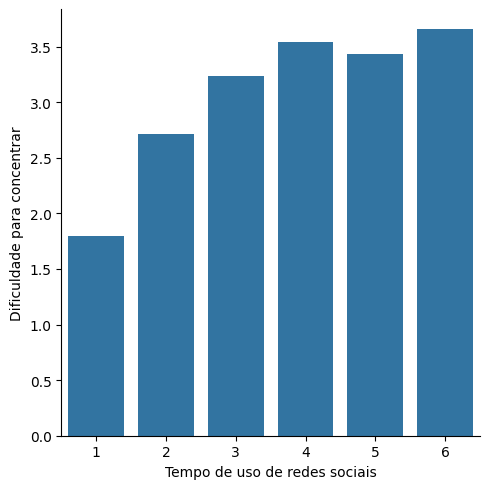

In [50]:
seaborn.catplot(x='col8', y='col14', data=sub3, kind="bar", errorbar=None)
plt.xlabel('Tempo de uso de redes sociais')
plt.ylabel('Dificuldade para concentrar')

<h3>Conclusão</h3>

* O grupo 1 comparado com todos os outros grupos mostram diferenças médias estatisticamente significativas.

* O grupo 2 comparado com todos os outros grupos, com exceção do grupo 3, mostram diferenças médias estatisticamente significativas.

* **Podemos concluir que as pessoas do grupo 1 (Menos de uma hora) e do grupo 2 (Entre 1 e 2 horas) possuem mais facilidades para se concentrar do que os 
grupo 4 (Entre 3 e 4 horas), grupo 5 (Entre 4 e 5 horas) e o grupo 6 (Mais de 5 horas)**

* **Ou seja, de acordo com os resultados dessa pesquisa o uso excessivo de redes sociais causa uma dificuldade para se concentrar**

<h3>Agora, iremos analisar a coluna 8 com a coluna 15</h3>

## Questão de pesquisa

    O tempo que se passa em redes sociais está associada a frequencia que você se compara com os outros online?

### População de jovens e adultos 

### Variáveis

*    **Variável Categorica:** Qual a quantidade tempo que você passa em redes sociais

*    **Variavel numérica:** O quanto você se comprara com pessoas online? (pergunta de 1 a 5)

### Hipóteses

*    **Hipótese Nula:** Não há relação entre o uso excessivo de redes sociais e a frequência que quanto você se comprara com pessoas online

*    **Hipótese Alternativa:** Há relação entre o uso excessivo de redes sociais e a frequência você se comprara com pessoas online

In [5]:
sub3 = data[['col8', 'col15']].dropna()

model2 = smf.ols(formula='col15~ C(col8)', data=sub3).fit()
print (model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  col15   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     5.268
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           0.000101
Time:                        02:26:10   Log-Likelihood:                -833.56
No. Observations:                 481   AIC:                             1679.
Df Residuals:                     475   BIC:                             1704.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1471      0.236      9.088   

In [6]:
mc1 = multi.MultiComparison(sub3['col15'], sub3['col8'])
res1 = mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.2958 0.9087 -0.5282 1.1198  False
     1      3   0.4767 0.5024 -0.3048 1.2582  False
     1      4   1.0035 0.0042  0.2135 1.7934   True
     1      5   0.8828 0.0296  0.0528 1.7128   True
     1      6   0.9305 0.0076  0.1618 1.6992   True
     2      3   0.1809  0.959 -0.4321 0.7939  False
     2      4   0.7077 0.0157   0.084 1.3314   True
     2      5    0.587 0.1281 -0.0867 1.2607  False
     2      6   0.6347 0.0295  0.0382 1.2313   True
     3      4   0.5268 0.0852 -0.0397 1.0933  False
     3      5   0.4061 0.4214  -0.215 1.0272  False
     3      6   0.4538 0.1511 -0.0826 0.9903  False
     4      5  -0.1207 0.9942 -0.7523 0.5109  False
     4      6   -0.073  0.999 -0.6216 0.4757  False
     5      6   0.0477 0.9999 -0.5571 0.6526  False
---------------------------------------------------


Text(9.444444444444445, 0.5, 'Maior compração')

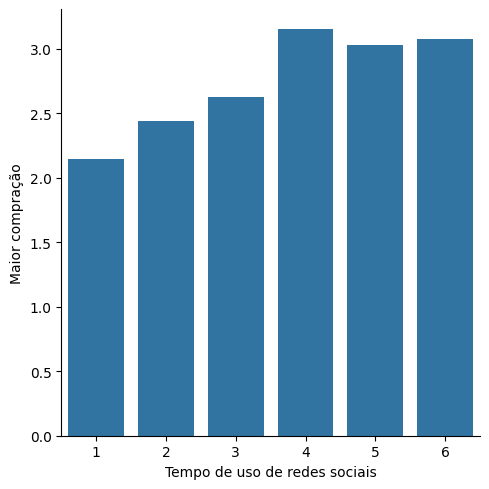

In [8]:
seaborn.catplot(x='col8', y='col15', data=sub3, kind="bar", errorbar=None)
plt.xlabel('Tempo de uso de redes sociais')
plt.ylabel('Maior compração')

<h3>Conclusão</h3>

* O grupo 1 (Menos de uma hora) comparado com o grupo 5 (Entre 4 e 5 horas) e com o grupo 6 (Mais de 5 horas) mostram diferenças 
médias estatisticamente significativas

* E o grupo 2 (Entre 1 e 2 horas) comparado com o grupo 4 (Entre 3 e 4 horas) e com o grupo 6 (Mais de 5 horas) mostram diferenças 
médias estatisticamente significativas

* **Em resumo, o resultado indica que o uso excessivo de redes sociais está associado a uma maior tendência de se comparar com pessoas mais bem sucedidas, em comparação com aqueles que passam menos tempo. No entanto, não há diferenças significativas entre os grupos de tempo mais longo. Essa associação pode sugerir uma possível relação entre o uso prolongado de redes sociais e questões de autoestima.**

<h3>Agora, iremos analisar a coluna 8 com a coluna 17</h3>

## Questão de pesquisa

    O tempo que se passa em redes sociais está associada a uma maior busca por validação online?

### População de jovens e adultos 

### Variáveis

*    **Variável Categorica:** Qual a quantidade tempo que você passa em redes sociais

*    **Variavel numérica:** Com que frequência você busca validação de recursos de mídia social? (pergunta de 1 a 5)

### Hipóteses

*    **Hipótese Nula:** Não há relação entre o uso excessivo de redes sociais e a frequência que você busca validação de recursos de mídia social.

*    **Hipótese Alternativa:** Há relação entre o uso excessivo de redes sociais e a frequência que você busca validação de recursos de mídia social.

In [58]:
sub3 = data[['col8', 'col17']].dropna()

model2 = smf.ols(formula='col17~ C(col8)', data=sub3).fit()
print (model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  col17   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.386
Date:                Wed, 29 Nov 2023   Prob (F-statistic):              0.228
Time:                        19:31:13   Log-Likelihood:                -784.99
No. Observations:                 481   AIC:                             1582.
Df Residuals:                     475   BIC:                             1607.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.0588      0.214      9.641   

In [59]:
mc1 = multi.MultiComparison(sub3['col17'], sub3['col8'])
res1 = mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.2555 0.9238 -0.4894 1.0003  False
     1      3   0.3966 0.5947 -0.3099 1.1031  False
     1      4   0.3605 0.6996 -0.3536 1.0746  False
     1      5   0.5382 0.3143 -0.2121 1.2885  False
     1      6   0.5446 0.2203 -0.1502 1.2395  False
     2      3   0.1412 0.9783  -0.413 0.6953  False
     2      4   0.1051 0.9948 -0.4587 0.6689  False
     2      5   0.2827 0.7691 -0.3263 0.8917  False
     2      6   0.2892 0.6422 -0.2501 0.8284  False
     3      4  -0.0361    1.0 -0.5482  0.476  False
     3      5   0.1416 0.9793 -0.4198  0.703  False
     3      6    0.148 0.9527 -0.3369 0.6329  False
     4      5   0.1777 0.9488 -0.3933 0.7486  False
     4      6   0.1841 0.8961 -0.3118   0.68  False
     5      6   0.0064    1.0 -0.5403 0.5532  False
---------------------------------------------------


Text(9.444444444444445, 0.5, 'Maior compração')

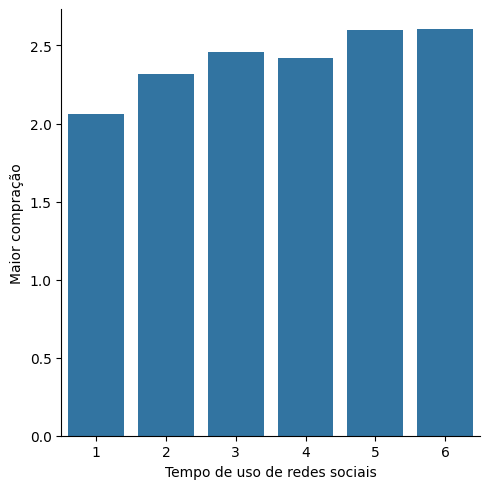

In [60]:
seaborn.catplot(x='col8', y='col17', data=sub3, kind="bar", errorbar=None)
plt.xlabel('Tempo de uso de redes sociais')
plt.ylabel('Maior compração')

<h3>Conclusão</h3>

* **Em resumo, com base nesta análise específica, não há evidências estatísticas para apoiar a ideia de que o tempo gasto em redes sociais está diretamente relacionado à busca por validação online.**

<h3>Agora, iremos analisar a coluna 8 com a coluna 18</h3>

## Questão de pesquisa

    O tempo que se passa em redes sociais está associada a um maior sentimento de depressão?

### População de jovens e adultos 

### Variáveis

*    **Variável Categorica:** Qual a quantidade tempo que você passa em redes sociais

*    **Variavel numérica:**  Com que frequência você se sente deprimido ou pra baixo?(pergunta de 1 a 5)

### Hipóteses

*    **Hipótese Nula:** Não há relação entre o uso excessivo de redes sociais e  um maior sentimento de depressão

*    **Hipótese Alternativa:** Há relação entre o uso excessivo de redes sociais e  um maior sentimento de depressão

In [14]:
sub3 = data[['col8', 'col18']].dropna()

model2 = smf.ols(formula='col18~ C(col8)', data=sub3).fit()
print (model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  col18   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     13.46
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           2.73e-12
Time:                        02:37:02   Log-Likelihood:                -781.14
No. Observations:                 481   AIC:                             1574.
Df Residuals:                     475   BIC:                             1599.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.0000      0.212      9.440   

In [16]:
mc1 = multi.MultiComparison(sub3['col18'], sub3['col8'])
res1 = mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2      0.8 0.0251  0.0611 1.5389   True
     1      3   1.1782    0.0  0.4774 1.8791   True
     1      4   1.3656    0.0  0.6572  2.074   True
     1      5   1.4478    0.0  0.7035  2.192   True
     1      6   1.7672    0.0  1.0779 2.4566   True
     2      3   0.3782  0.362 -0.1715 0.9279  False
     2      4   0.5656 0.0457  0.0063 1.1249   True
     2      5   0.6478 0.0275  0.0436 1.2519   True
     2      6   0.9672    0.0  0.4323 1.5022   True
     3      4   0.1874 0.8986 -0.3206 0.6954  False
     3      5   0.2695 0.7362 -0.2874 0.8265  False
     3      6    0.589 0.0066   0.108 1.0701   True
     4      5   0.0822 0.9984 -0.4842 0.6486  False
     4      6   0.4016 0.1818 -0.0903 0.8936  False
     5      6   0.3195 0.5421 -0.2229 0.8619  False
---------------------------------------------------


Text(9.444444444444445, 0.5, 'Maior sentimento de depressão')

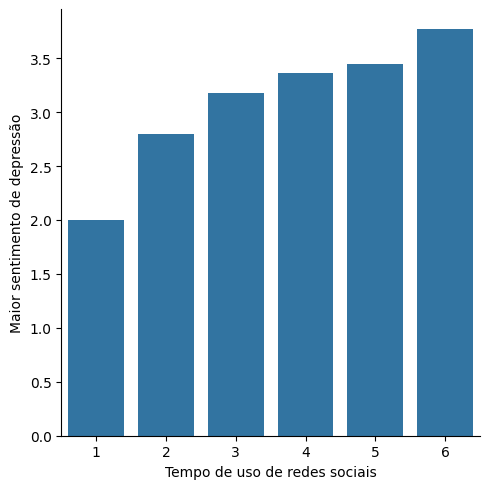

In [18]:
seaborn.catplot(x='col8', y='col18', data=sub3, kind="bar", errorbar=None)
plt.xlabel('Tempo de uso de redes sociais')
plt.ylabel('Maior sentimento de depressão')

<h3>Conclusão</h3>

* O grupo 1 (Menos de uma hora) comparado com todos os outros grupos mostram diferenças médias estatisticamente significativas.

* O grupo 2 (Entre 1 e 2 horas) comparado com todos os outros grupos, com excessão do grupo 3 (Entre 2 e 3 horas) mostram diferenças médias estatisticamente significativas.

* Há uma diferença significativa entre o grupo 3 (Entre 2 e 3 horas) e o grupo 6 (Mais de 5 horas)

*  **Pode-se concluir, com base nesta análise específica, há evidências estatísticas para sugerir que o tempo gasto em redes sociais está associado a um maior sentimento de depressão. Especificamente, indivíduos que passam diferentes quantidades de tempo em redes sociais podem experimentar níveis significativamente diferentes de sentimento de depressão.**

*  **Ou seja, de acordo com os resultados o uso excessivo de redes sociais está ligada a um maior sentimento de depressão**


<h3>Agora, iremos analisar a coluna 8 com a coluna 19</h3>

## Questão de pesquisa

    O tempo que se passa em redes sociais está associada a uma maior oscilação no seu interesse nas atividades diárias?

### População de jovens e adultos 

### Variáveis

*    **Variável Categorica:** Qual a quantidade tempo que você passa em redes sociais

*    **Variavel numérica:** Numa escala de 1 a 5, com que frequência oscila o seu interesse nas atividades diárias?

### Hipóteses

*    **Hipótese Nula:** Não há relação entre o uso excessivo de redes sociais e uma maior oscilação no seu interesse nas atividades diárias

*    **Hipótese Alternativa:** Há relação entre o uso excessivo de redes sociais e uma maior oscilação no seu interesse nas atividades diárias

In [23]:
sub3 = data[['col8', 'col19']].dropna()

model2 = smf.ols(formula='col19~ C(col8)', data=sub3).fit()
print (model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  col19   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     10.70
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           9.35e-10
Time:                        02:48:03   Log-Likelihood:                -766.24
No. Observations:                 481   AIC:                             1544.
Df Residuals:                     475   BIC:                             1570.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1176      0.205     10.310   

In [25]:
mc1 = multi.MultiComparison(sub3['col19'], sub3['col8'])
res1 = mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.6824 0.0721  -0.034 1.3987  False
     1      3   0.8923 0.0026  0.2128 1.5717   True
     1      4    1.291    0.0  0.6042 1.9777   True
     1      5    1.151 0.0001  0.4294 1.8726   True
     1      6   1.4772    0.0  0.8089 2.1455   True
     2      3   0.2099 0.8701 -0.3231 0.7429  False
     2      4   0.6086 0.0176  0.0663 1.1509   True
     2      5   0.4687 0.2003  -0.117 1.0544  False
     2      6   0.7948 0.0002  0.2762 1.3135   True
     3      4   0.3987 0.1894 -0.0938 0.8912  False
     3      5   0.2588 0.7443 -0.2812 0.7987  False
     3      6   0.5849 0.0049  0.1185 1.0513   True
     4      5  -0.1399 0.9783 -0.6891 0.4092  False
     4      6   0.1862 0.8742 -0.2908 0.6632  False
     5      6   0.3262 0.4831 -0.1997  0.852  False
---------------------------------------------------


Text(9.444444444444445, 0.5, 'Oscila interesses')

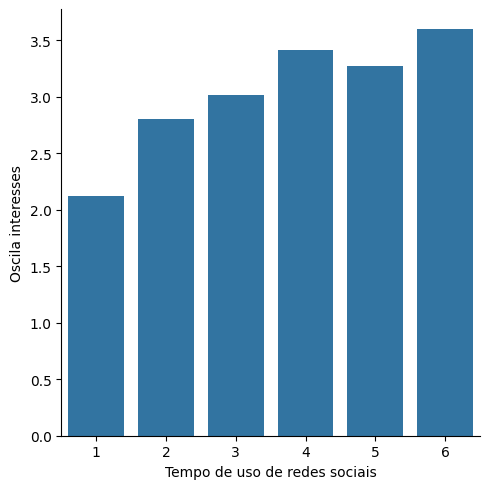

In [26]:
seaborn.catplot(x='col8', y='col19', data=sub3, kind="bar", errorbar=None)
plt.xlabel('Tempo de uso de redes sociais')
plt.ylabel('Oscila interesses')

<h3>Conclusão</h3>

* O grupo 1 (Menos de uma hora) comparado com todos os outros grupos, com excessão do grupo 2 (Entre 1 e 2 horas) mostram diferenças médias estatisticamente significativas.

* O grupo 1 (Entre 1 e 2 horas)) comparado com todos os outros grupos, com excessão do grupo 3 (Entre 2 e 3 horas) mostram diferenças médias estatisticamente significativas.

* Tambem há uma diferença média entre o grupo 3 (Emte 2 e 3 horas) e o grupo 6 (Mais de 5 horas)

*  **Pode-se concluir, com base nesta análise específica, há evidências estatísticas para sugerir que o tempo gasto em redes sociais está associado a uma maior oscilação no interesse nas atividades diárias.**

* ** **

<h3>Por último, iremos analisar a coluna 8 com a coluna 20</h3>

## Questão de pesquisa

    O tempo que se passa em redes sociais está associada a problemas durante o sono?

### População de jovens e adultos 

### Variáveis

*    **Variável Categorica:** Qual a quantidade tempo que você passa em redes sociais

*    **Variavel numérica:** Numa escala de 1 a 5, com que frequência você enfrenta problemas relacionados ao sono?

### Hipóteses

*    **Hipótese Nula:** Não há relação entre o uso excessivo de redes sociais e a frequência que se tem problemas relacionados ao sono.

*    **Hipótese Alternativa:** Há relação entre o uso excessivo de redes sociais e a frequência que se tem problemas relacionados ao sono.

In [27]:
sub3 = data[['col8', 'col20']].dropna()

model2 = smf.ols(formula='col20~ C(col8)', data=sub3).fit()
print (model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  col20   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     3.314
Date:                Wed, 29 Nov 2023   Prob (F-statistic):            0.00595
Time:                        11:48:59   Log-Likelihood:                -856.32
No. Observations:                 481   AIC:                             1725.
Df Residuals:                     475   BIC:                             1750.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.5588      0.248     10.330   

In [28]:
mc1 = multi.MultiComparison(sub3['col20'], sub3['col8'])
res1 = mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.3126 0.9058 -0.5513 1.1765  False
     1      3     0.56 0.3698 -0.2594 1.3794  False
     1      4   0.7207 0.1291 -0.1075  1.549  False
     1      5   0.9039 0.0365  0.0337 1.7741   True
     1      6   0.8895 0.0208  0.0835 1.6954   True
     2      3   0.2474 0.8808 -0.3953 0.8901  False
     2      4   0.4081 0.4759 -0.2458 1.0621  False
     2      5   0.5913 0.1599 -0.1151 1.2976  False
     2      6   0.5768 0.0901 -0.0486 1.2023  False
     3      4   0.1608 0.9717 -0.4332 0.7547  False
     3      5   0.3439 0.6573 -0.3073  0.995  False
     3      6   0.3295 0.5483  -0.233 0.8919  False
     4      5   0.1831  0.969 -0.4791 0.8454  False
     4      6   0.1687   0.96 -0.4065 0.7439  False
     5      6  -0.0144    1.0 -0.6486 0.6198  False
---------------------------------------------------


Text(9.444444444444445, 0.5, 'Problemas durante o sono')

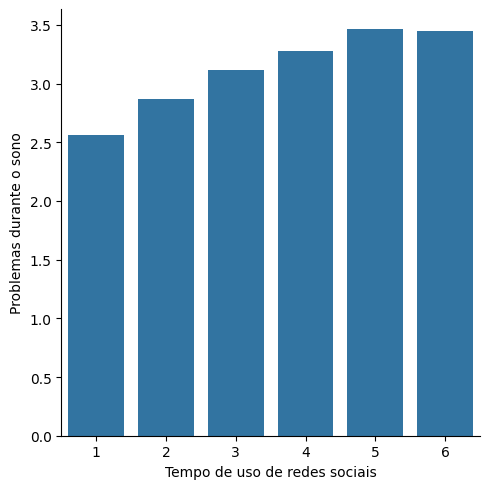

In [30]:
seaborn.catplot(x='col8', y='col20', data=sub3, kind="bar", errorbar=None)
plt.xlabel('Tempo de uso de redes sociais')
plt.ylabel('Problemas durante o sono')

<h3>Conclusão</h3>

* os grupos 5 (Entre 4 e 5 horas) e 6 (Mais de 5 horas) mostram diferenças significativas em relação ao grupo 1 (Menos de uma hora).

* **Esses resultados levam-nos a rejeitar a hipótese nula de que não há relação entre o uso excessivo de redes sociais e a frequência de problemas relacionados ao sono. Em vez disso, há indícios estatísticos de que as médias desses grupos são diferentes, sugerindo que o tempo gasto em redes sociais pode estar associado a uma maior frequência de problemas de sono, especialmente nos grupos que relatam passar mais de 4 horas online.**

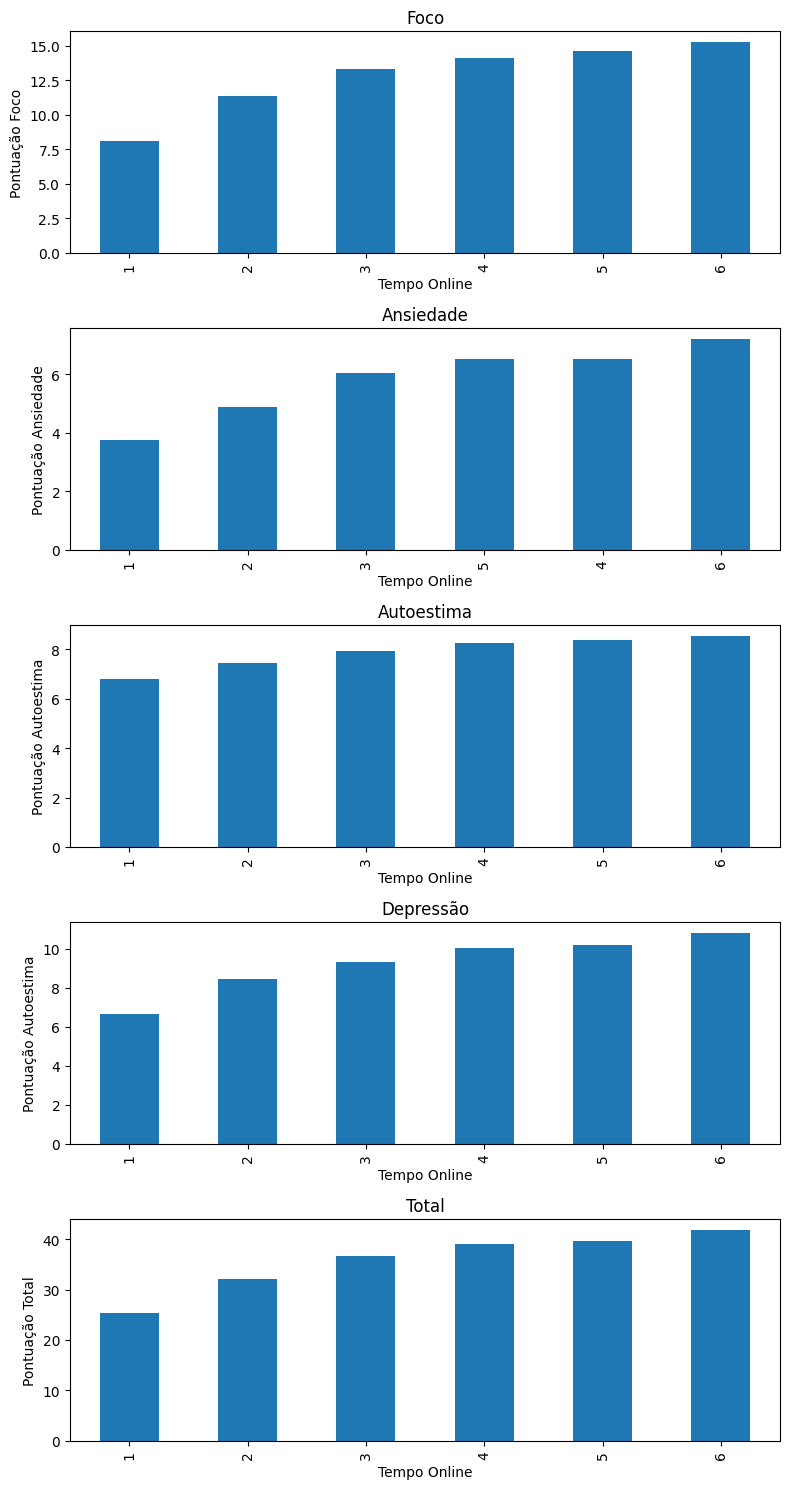

In [97]:
## Somando as pontuações das perguntas sobre foco, ansiedade, autoestima e depressão e criando uma nova coluna
Foco = ['col9', 'col10', 'col12', 'col14']
data['Foco_Pontuacao'] = data[Foco].sum(axis=1)

Ansiedade = ['col11', 'col13']
data['Ansiedade_Pontuacao'] = data[Ansiedade].sum(axis=1)

Autoestima = ['col15', 'col16','col17']
data['Autoestima_Pontuacao'] = data[Autoestima].sum(axis=1)

Depressao = ['col18', 'col19','col20']
data['Depressao_Pontuacao'] = data[Depressao].sum(axis=1)

Total = ['Foco_Pontuacao', 'Ansiedade_Pontuacao','Autoestima_Pontuacao','Depressao_Pontuacao']
data['Total_Pontuacao'] = data[Total].sum(axis=1)

##data.groupby('col8')['Foco_Pontuacao'].mean().sort_values(ascending=True).plot.bar(ylabel='Mean ADHD Score')
##data.groupby('col8')['Ansiedade_Pontuacao'].mean().sort_values(ascending=True).plot.bar(ylabel='Mean ADHD Score')
##data.groupby('col8')['Autoestima_Pontuacao'].mean().sort_values(ascending=True).plot.bar(ylabel='Mean ADHD Score')
##data.groupby('col8')['Depressao_Pontuacao'].mean().sort_values(ascending=True).plot.bar(ylabel='Mean ADHD Score')
##data.groupby('col8')['Total_Score'].mean().sort_values(ascending=True).plot.bar(ylabel='Mean ADHD Score')

import matplotlib.pyplot as plt

# Agrupar e calcular a média para cada variável
adhd_score = data.groupby('col8')['Foco_Pontuacao'].mean().sort_values(ascending=True)
ansiedade_score = data.groupby('col8')['Ansiedade_Pontuacao'].mean().sort_values(ascending=True)
autoestima_score = data.groupby('col8')['Autoestima_Pontuacao'].mean().sort_values(ascending=True)
depressao_score = data.groupby('col8')['Depressao_Pontuacao'].mean().sort_values(ascending=True)
total_score = data.groupby('col8')['Total_Pontuacao'].mean().sort_values(ascending=True)

# Configurar subplots
fig, axes = plt.subplots(nrows=5, figsize=(8, 15))

# Criar gráficos de barras para cada variável
adhd_score.plot.bar(ax=axes[0], ylabel='Pontuação Foco', xlabel='Tempo Online', title='Foco')
ansiedade_score.plot.bar(ax=axes[1], ylabel='Pontuação Ansiedade', xlabel='Tempo Online', title='Ansiedade')
autoestima_score.plot.bar(ax=axes[2], ylabel='Pontuação Autoestima', xlabel='Tempo Online', title='Autoestima')
depressao_score.plot.bar(ax=axes[3], ylabel='Pontuação Autoestima', xlabel='Tempo Online', title='Depressão')
total_score.plot.bar(ax=axes[4], ylabel='Pontuação Total', xlabel='Tempo Online', title='Total')

# Ajustar layout
plt.tight_layout()

# Exibir os subplots
plt.show()



In [100]:
print('Observando os resultados para a pontução total de foco')
mc1 = multi.MultiComparison(data['Foco_Pontuacao'], data['col8'])
res1 = mc1.tukeyhsd()
print(res1.summary())

print('')
print('Observando os resultados para a pontução total de ansiedade')
mc1 = multi.MultiComparison(data['Ansiedade_Pontuacao'], data['col8'])
res2 = mc1.tukeyhsd()
print(res2.summary())

print('')
print('Observando os resultados para a pontução total de autoestima')
mc1 = multi.MultiComparison(data['Autoestima_Pontuacao'], data['col8'])
res3 = mc1.tukeyhsd()
print(res3.summary())

print('')
print('Observando os resultados para a pontução total de depressão')
mc1 = multi.MultiComparison(data['Depressao_Pontuacao'], data['col8'])
res4 = mc1.tukeyhsd()
print(res4.summary())

print('')
print('Observando os resultados para a pontução total geral')
mc1 = multi.MultiComparison(data['Total_Pontuacao'], data['col8'])
res5 = mc1.tukeyhsd()
print(res5.summary())


Observando os resultados para a pontução total de foco
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   3.2983 0.0001  1.2661 5.3305   True
     1      3   5.2778    0.0  3.3502 7.2054   True
     1      4   6.0595    0.0  4.1111 8.0078   True
     1      5   6.5382    0.0  4.4912 8.5852   True
     1      6   7.2084    0.0  5.3125 9.1043   True
     2      3   1.9795 0.0028  0.4676 3.4914   True
     2      4   2.7611    0.0  1.2228 4.2994   True
     2      5   3.2399    0.0  1.5783 4.9014   True
     2      6   3.9101    0.0  2.4387 5.3815   True
     3      4   0.7816 0.5984 -0.6155 2.1788  False
     3      5   1.2604 0.1748 -0.2714 2.7922  False
     3      6   1.9306 0.0005  0.6075 3.2537   True
     4      5   0.4787 0.9513 -1.0791 2.0366  False
     4      6    1.149 0.1482 -0.2042 2.5021  False
     5      6   0.6702 0.7929 -0.8215  2.162  False
---------

**A conclusão geral é que o tempo gasto online, representado pelos diferentes grupos, está associado a variações significativas nas medidas de foco, ansiedade, autoestima, depressão e na pontuação total geral. Essas conclusões são valiosas para compreender os impactos potenciais do tempo online na saúde mental.**